STARTER PROJECT !!

In [7]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [9]:
def generate_dataset(num_images):
    #image size is 64x64x(rgb), labels are 
    # 0) blue x
    # 1) blue t
    # 2) red x
    # 3) red t
    images = []
    labels = []
    for i in range (num_images):
        image = np.random.randint(0, 256, (64, 64, 3), dtype=np.uint8)
        a, b = np.random.randint(2, 62), np.random.randint(2, 62) #shape center
        label = np.random.randint(0, 4)
        match label:
            case 0:
                shape_coords = [(a, b), (a+1, b+1), (a+2, b+2), (a+1, b-1), (a+2, b-2), (a-1, b-1), (a-2, b-2), (a-1, b+1), (a-2, b+2)]
                for coord in shape_coords:
                    image[coord[0]][coord[1]] = np.array([0, 0, 255])
            case 1:
                shape_coords = [(a, b), (a+1, b), (a+2, b), (a-1, b), (a-2, b), (a, b-1), (a, b-2), (a, b+1), (a, b+2)]
                for coord in shape_coords:
                    image[coord[0]][coord[1]] = np.array([0, 0, 255])
            case 2:
                shape_coords = [(a, b), (a+1, b+1), (a+2, b+2), (a+1, b-1), (a+2, b-2), (a-1, b-1), (a-2, b-2), (a-1, b+1), (a-2, b+2)]
                for coord in shape_coords:
                    image[coord[0]][coord[1]] = np.array([255, 0, 0])
            case 3:
                shape_coords = [(a, b), (a+1, b), (a+2, b), (a-1, b), (a-2, b), (a, b-1), (a, b-2), (a, b+1), (a, b+2)]
                for coord in shape_coords:
                    image[coord[0]][coord[1]] = np.array([255, 0, 0])
        images.append(image)
        labels.append(label)
    return images, labels


        

In [11]:
images, labels = generate_dataset(1000)

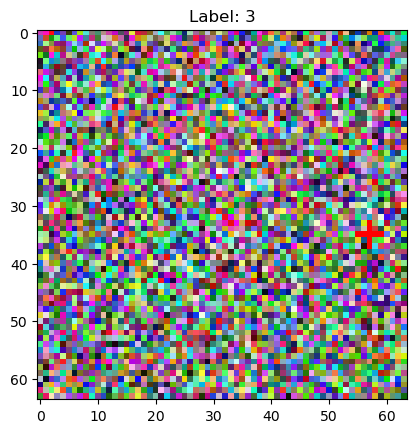

In [16]:
for i in range (10):
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.show

In [23]:
from sklearn.model_selection import train_test_split

def preprocess_dataset(images, labels, test_size = 0.2, random_state=42):
    images = np.array(images).astype('float32')/255.0
    train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=test_size, random_state=random_state)
    return train_images, test_images, train_labels, test_labels




In [31]:
train_images, test_images, train_labels, test_labels = preprocess_dataset(images, labels, 0.2, 42)
train_images, test_images, train_labels, test_labels = np.array(train_images), np.array(test_images), np.array(train_labels), np.array(test_labels)

In [32]:
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense (fully connected) layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [33]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10


c:\Users\kevin\anaconda3\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 1s 39ms/step - loss: 0.0000e+00 - accuracy: 0.2438 - val_loss: 0.0000e+00 - val_accuracy: 0.2750
Epoch 2/10
20/20 [==============================] - 1s 33ms/step - loss: 0.0000e+00 - accuracy: 0.2453 - val_loss: 0.0000e+00 - val_accuracy: 0.2750
Epoch 3/10
20/20 [==============================] - 1s 34ms/step - loss: 0.0000e+00 - accuracy: 0.2453 - val_loss: 0.0000e+00 - val_accuracy: 0.2750
Epoch 4/10
20/20 [==============================] - 1s 32ms/step - loss: 0.0000e+00 - accuracy: 0.2453 - val_loss: 0.0000e+00 - val_accuracy: 0.2750
Epoch 5/10
20/20 [==============================] - 1s 32ms/step - loss: 0.0000e+00 - accuracy: 0.2453 - val_loss: 0.0000e+00 - val_accuracy: 0.2750
Epoch 6/10
20/20 [==============================] - 1s 32ms/step - loss: 0.0000e+00 - accuracy: 0.2453 - val_loss: 0.0000e+00 - val_accuracy: 0.2750
Epoch 7/10
20/20 [==============================] - 1s 31ms/step - loss: 0.0000e+00 - accuracy: 0.2453 - val_loss: 0.

7/7 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.2750


c:\Users\kevin\anaconda3\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


Test accuracy: 0.2750000059604645


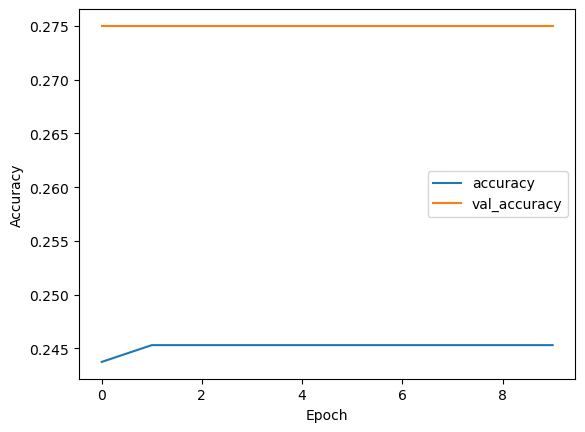

In [34]:
# Evaluation on a test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
